In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import train_test_split

In [ ]:
#@title Run this code if import from google collab
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#@title Import Data

#Code for importing data via in google collab
myfile = "/content/drive/MyDrive/Colab Notebooks/DS 397/Machine Problem 2/A_Z Handwritten Data.csv"
df  = pd.read_csv(myfile)

#For importing data if in Local Machine
# df = pd.read_csv("A_Z Handwritten Data.csv")
print(df.shape)

(372450, 785)


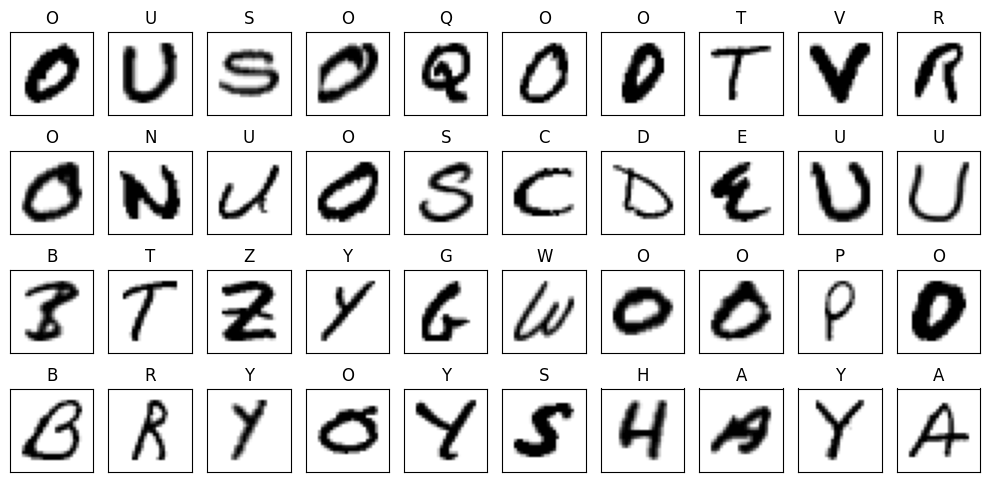

In [ ]:
#@title Visualize Dataset of Images
X = df.iloc[:,1:].to_numpy()/255
y = df.iloc[:,0].to_numpy()
rows, cols = 4, 10
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',
subplot_kw=dict(xticks=[], yticks=[]),
figsize=(10,5))
for row in range(rows):
  for col in range(cols):
    n = np.random.randint(372449)
    # show random samples
    im = ax[row, col].imshow(X[n].reshape((28,28)), cmap=plt.cm.gray_r)
    ax[row, col].set_title(chr(y[n]+65))

plt.tight_layout()
plt.show()

In [ ]:
#@title Sampled from the dataset and export
# Get the unique labels (letters)
unique_labels = df.iloc[:, 0].unique()

# Initialize an empty DataFrame to store the sampled data
df2 = pd.DataFrame(columns=df.columns)

# Loop through each unique label and sample 100 rows
for idx in range(0,26):
    label_df = df[df.iloc[:, 0] == idx]
    sampled_label_df = label_df.sample(n=100, random_state=42)
    df2 = pd.concat([df2, sampled_label_df], ignore_index=True)

# Verify the resulting DataFrame
print("\nSampled DataFrame Info:")
print(df2.head())
print(df2.info())
print(df2.iloc[:, 0].value_counts())
print(df2.shape)


Sampled DataFrame Info:
   0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9  ... 0.639 0.640 0.641 0.642 0.643  \
0  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
1  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
2  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
3  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
4  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   

  0.644 0.645 0.646 0.647 0.648  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 785 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 785 entries, 0 to 0.648
dtypes: object(785)
memory usage: 15.6+ MB
None
0
0     100
1     100
24    100
23    100
22    100
21    100
20    100
19    100
18    100
17    100
16    100
15   

In [ ]:
#@title Export the sampled DataFrame to a CSV file
df2.to_csv('sampled_dataset.csv', index=False)
print("Sampled dataset exported to 'sampled_dataset.csv'.")

Sampled dataset exported to 'sampled_dataset.csv'.


In [ ]:
#@title Read the New imported csv file

#Code if from google collab
# myfile2 = "/content/drive/MyDrive/Colab Notebooks/DS 397/Machine Problem 2/sampled_dataset.csv"
# df3 = pd.read_csv(myfile2)

#Code for Local Machine
df3 = pd.read_csv("sampled_dataset.csv")
# print(df3.shape)

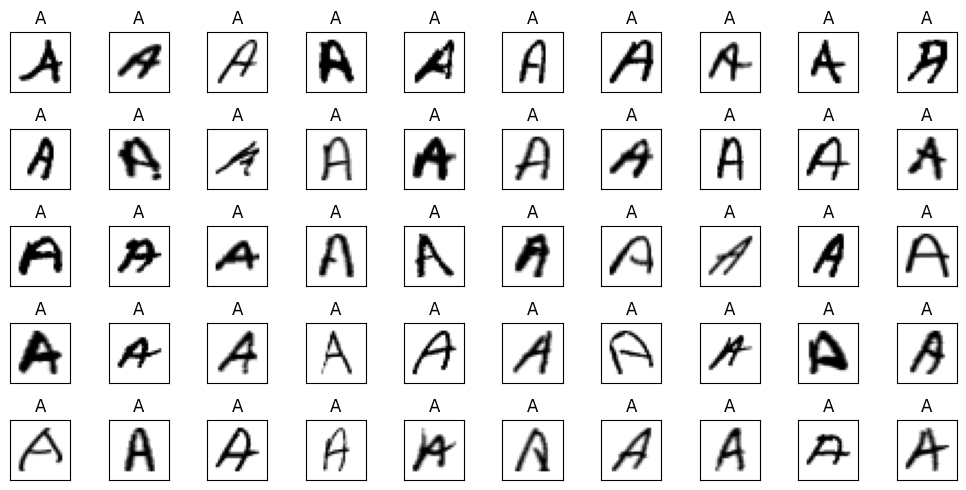

In [ ]:
#@title Visualize Dataset of Samples Images
X_sampled = df3.iloc[:,1:].to_numpy()/255
y_sampled = df3.iloc[:,0].to_numpy()
rows, cols = 5, 10
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',
subplot_kw=dict(xticks=[], yticks=[]),
figsize=(10,5))
for row in range(rows):
  for col in range(cols):
    n = np.random.randint(df3.shape[0])
    # show random samples
    im = ax[row, col].imshow(X[n].reshape((28,28)), cmap=plt.cm.gray_r)
    ax[row, col].set_title(chr(y[n]+65))

plt.tight_layout()
plt.show()

In [ ]:
#@title Create the target names dictionary
target_names = {i: chr(65 + i) for i in range(26)}

print(df3.iloc[:,0].unique())
print(target_names)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


In [ ]:
#@title Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=0, stratify=y_sampled)

#1b.) Dimensionality Reduction

Reduce the data but now using any manifold learning algorithm (kernel PCA, isomap embedding, spectral embedding, or t-SNE). Create a scatter plot similar to item (a). You may use the built-in manifold package in sklearn for this item.

## Kernel PCA

In [ ]:
#@title Perform Naive Kernel PCA
# Define the kernel function:
def kernel_func(x1, x2, kw):
    return np.exp(-pairwise_distances(x1, x2, metric='sqeuclidean') / kw ** 2)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Compute the kernel covariance matrix
kw = 4
K_train = kernel_func(X_train, X_train, kw)

# Center the kernel matrix
U_train = np.ones((N_train, N_train)) / N_train
K_train_cent = K_train - U_train @ K_train - K_train @ U_train + U_train @ K_train @ U_train

# Perform eigenvalue decomposition
eigvals, eigvecs = np.linalg.eig(K_train_cent / N_train)

# Ensure the eigenvalues are sorted in decreasing order
idx = (-eigvals).argsort()
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]

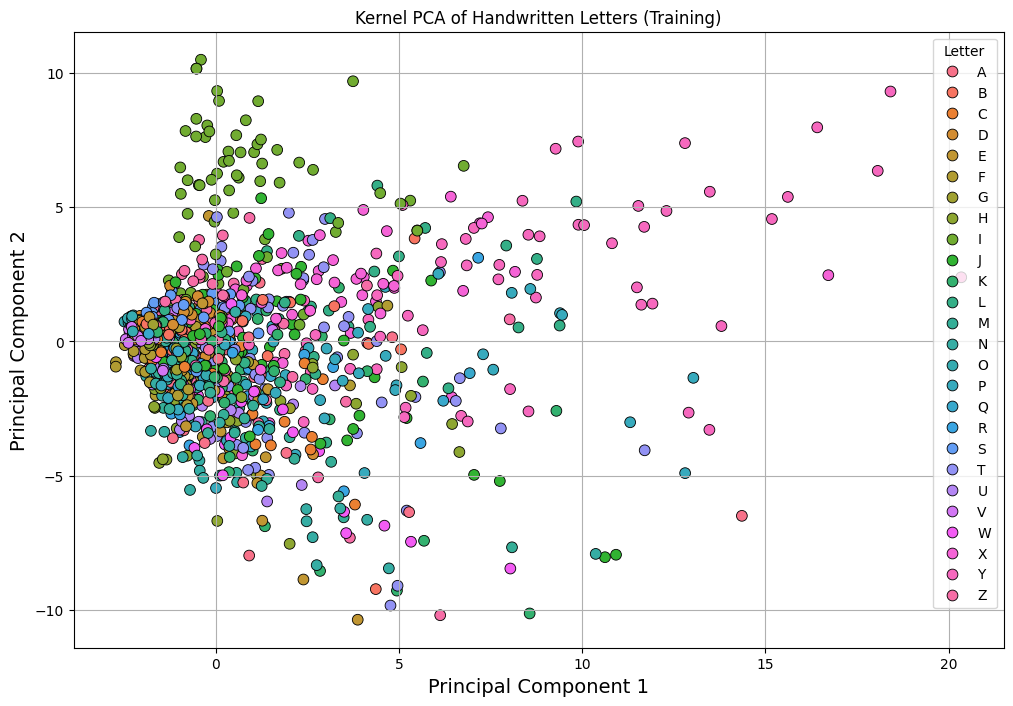

In [ ]:
#@title Project only using the first 2 principal components (eigenvectors) (training)
P = eigvecs[:,:2] @ np.diag(eigvals[:2] ** -0.5)
Xtrain_pca = K_train_cent @ P

K_test = kernel_func(X_test, X_train, kw)
U_test = np.ones((N_test, N_train)) / N_train
K_test_cent = K_test - U_test @ K_train - K_test @ U_train + U_test @ K_train @ U_train
Xtest_pca = K_test_cent @ P


# Create a DataFrame for the PCA results
kpca_df_train = pd.DataFrame(Xtrain_pca, columns=['PC 1', 'PC 2'])
kpca_df_train['Letter'] = pd.Categorical(y_train).map(target_names)

# Visualize the 2D latent space
plt.figure(figsize=(12, 8))
sns.scatterplot(data=kpca_df_train, x="PC 1", y="PC 2", hue="Letter", s=60, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title("Kernel PCA of Handwritten Letters (Training)")
plt.grid()
plt.show()


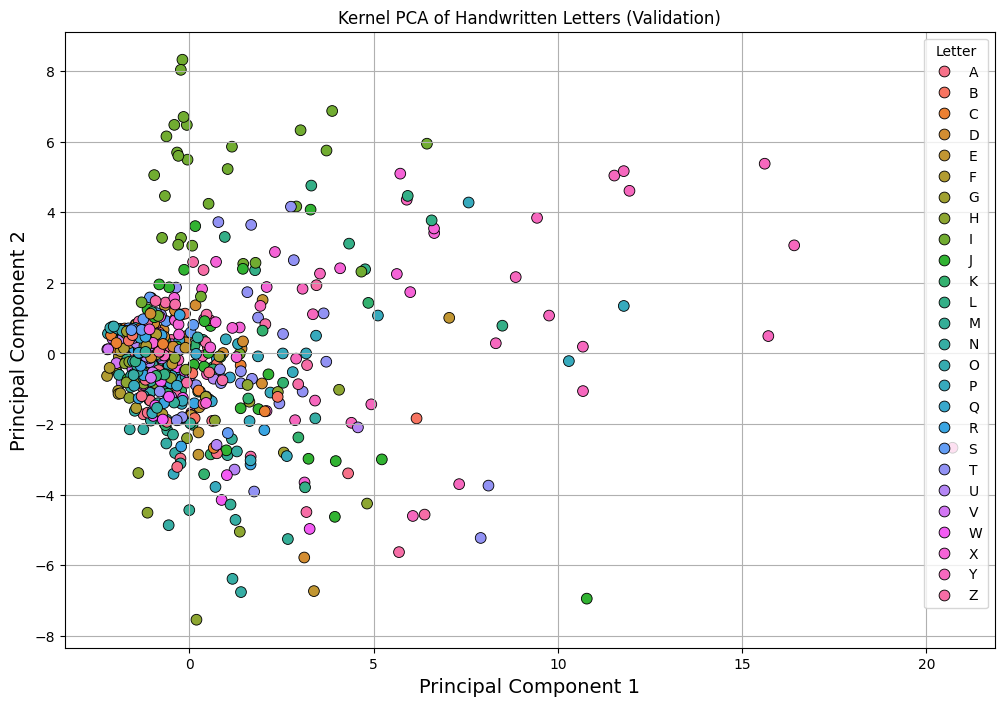

In [ ]:
#@title Project only using the first 2 principal components (eigenvectors) (Validation)
# Create a DataFrame for the PCA results
kpca_df_test = pd.DataFrame(Xtest_pca, columns=['PC 1', 'PC 2'])
kpca_df_test['Letter'] = pd.Categorical(y_test).map(lambda x: target_names[x])

# Visualize the 2D latent space
plt.figure(figsize=(12, 8))
sns.scatterplot(data=kpca_df_test, x="PC 1", y="PC 2", hue="Letter", s=60, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title("Kernel PCA of Handwritten Letters (Validation)")
plt.grid()
plt.show()

In [ ]:
#@title KPCA from sklearn
from sklearn.decomposition import KernelPCA

# Apply Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.03)
X_kpca = kpca.fit_transform(X_train)

# Create a DataFrame for the KPCA results
target_names = [chr(i) for i in range(65, 91)]  # Letters A-Z
kpca_df = pd.DataFrame(X_kpca, columns=['PC 1', 'PC 2'])
kpca_df['Letter'] = pd.Categorical(y_train).map(lambda x: target_names[x])

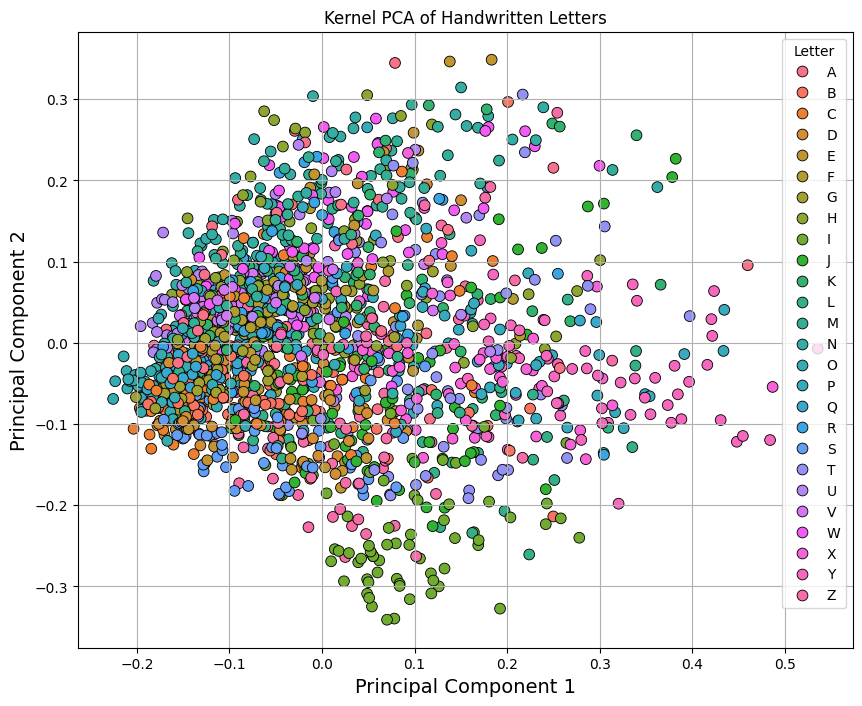

In [ ]:
#@title Visualize the 2D latent space via KPCA from sklearn
plt.figure(figsize=(10, 8))
sns.scatterplot(data=kpca_df, x="PC 1", y="PC 2", hue="Letter", s=60, edgecolor='k')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title("Kernel PCA of Handwritten Letters")
plt.grid()
plt.show()

# t-Distributed Stochastic Neighbor Embedding

In [ ]:
#@title TSNE from SKlearn
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sampled)

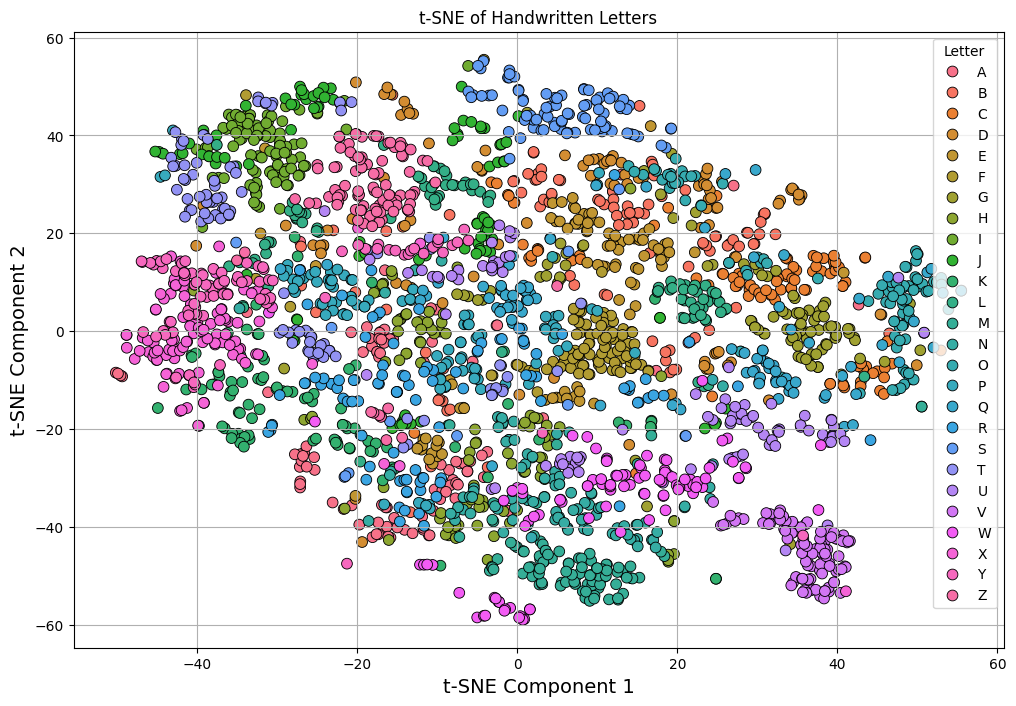

In [ ]:
#@title Visualize the 2D latent space via TSNE

tsne_df_train = pd.DataFrame(X_tsne, columns=['TSNE 1', 'TSNE 2'])
tsne_df_train['Letter'] = pd.Categorical(y_sampled).map(lambda x: target_names[x])
plt.figure(figsize=(12, 8))
sns.scatterplot(data=tsne_df_train, x="TSNE 1", y="TSNE 2", hue="Letter", s=60, edgecolor='k')
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.title("t-SNE of Handwritten Letters")
plt.grid(True)
plt.show()
